In [1]:
%matplotlib inline


# Creating Colormaps in Matplotlib

Matplotlib has a number of built-in colormaps accessible via
`.matplotlib.colormaps`.  There are also external libraries like
palettable_ that have many extra colormaps.


However, we often want to create or manipulate colormaps in Matplotlib.
This can be done using the class `.ListedColormap` or
`.LinearSegmentedColormap`.
Seen from the outside, both colormap classes map values between 0 and 1 to
a bunch of colors. There are, however, slight differences, some of which are
shown in the following.

Before manually creating or manipulating colormaps, let us first see how we
can obtain colormaps and their colors from existing colormap classes.


## Getting colormaps and accessing their values

First, getting a named colormap, most of which are listed in
:doc:`/tutorials/colors/colormaps`, may be done using `.matplotlib.colormaps`,
which returns a colormap object.  The length of the list of colors used
internally to define the colormap can be adjusted via `.Colormap.resampled`.
Below we use a modest value of 8 so there are not a lot of values to look at.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = mpl.colormaps['viridis'].resampled(8)

The object ``viridis`` is a callable, that when passed a float between
0 and 1 returns an RGBA value from the colormap:



In [3]:
print(viridis(0.56))

(0.122312, 0.633153, 0.530398, 1.0)


### ListedColormap

`.ListedColormap`\s store their color values in a ``.colors`` attribute.
The list of colors that comprise the colormap can be directly accessed using
the ``colors`` property,
or it can be accessed indirectly by calling  ``viridis`` with an array
of values matching the length of the colormap.  Note that the returned list
is in the form of an RGBA Nx4 array, where N is the length of the colormap.



In [4]:
print('viridis.colors', viridis.colors)
print('viridis(range(8))', viridis(range(8)))
print('viridis(np.linspace(0, 1, 8))', viridis(np.linspace(0, 1, 8)))

viridis.colors [[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis(range(8)) [[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis(np.linspace(0, 1, 8)) [[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]

The colormap is a lookup table, so "oversampling" the colormap returns
nearest-neighbor interpolation (note the repeated colors in the list below)



In [5]:
print('viridis(np.linspace(0, 1, 12))', viridis(np.linspace(0, 1, 12)))

viridis(np.linspace(0, 1, 12)) [[0.267004 0.004874 0.329415 1.      ]
 [0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


### LinearSegmentedColormap
`.LinearSegmentedColormap`\s do not have a ``.colors`` attribute.
However, one may still call the colormap with an integer array, or with a
float array between 0 and 1.



In [6]:
copper = mpl.colormaps['copper'].resampled(8)

print('copper(range(8))', copper(range(8)))
print('copper(np.linspace(0, 1, 8))', copper(np.linspace(0, 1, 8)))

copper(range(8)) [[0.         0.         0.         1.        ]
 [0.17647055 0.1116     0.07107143 1.        ]
 [0.35294109 0.2232     0.14214286 1.        ]
 [0.52941164 0.3348     0.21321429 1.        ]
 [0.70588219 0.4464     0.28428571 1.        ]
 [0.88235273 0.558      0.35535714 1.        ]
 [1.         0.6696     0.42642857 1.        ]
 [1.         0.7812     0.4975     1.        ]]
copper(np.linspace(0, 1, 8)) [[0.         0.         0.         1.        ]
 [0.17647055 0.1116     0.07107143 1.        ]
 [0.35294109 0.2232     0.14214286 1.        ]
 [0.52941164 0.3348     0.21321429 1.        ]
 [0.70588219 0.4464     0.28428571 1.        ]
 [0.88235273 0.558      0.35535714 1.        ]
 [1.         0.6696     0.42642857 1.        ]
 [1.         0.7812     0.4975     1.        ]]


## Creating listed colormaps

Creating a colormap is essentially the inverse operation of the above where
we supply a list or array of color specifications to `.ListedColormap` to
make a new colormap.

Before continuing with the tutorial, let us define a helper function that
takes one of more colormaps as input, creates some random data and applies
the colormap(s) to an image plot of that dataset.



In [7]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

In the simplest case we might type in a list of color names to create a
colormap from those.



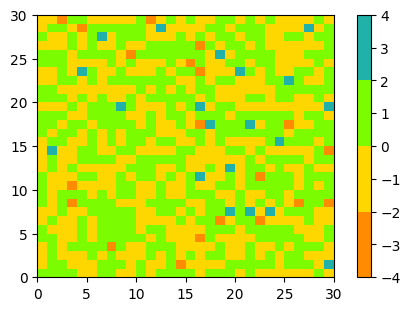

In [8]:
cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
plot_examples([cmap])

In fact, that list may contain any valid
:doc:`Matplotlib color specification </tutorials/colors/colors>`.
Particularly useful for creating custom colormaps are Nx4 numpy arrays.
Because with the variety of numpy operations that we can do on a such an
array, carpentry of new colormaps from existing colormaps become quite
straight forward.

For example, suppose we want to make the first 25 entries of a 256-length
"viridis" colormap pink for some reason:



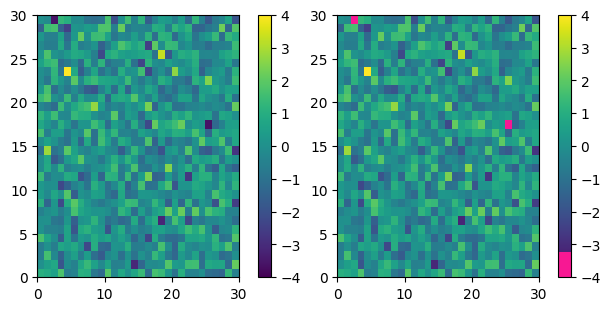

In [9]:
viridis = mpl.colormaps['viridis'].resampled(256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)

plot_examples([viridis, newcmp])

We can reduce the dynamic range of a colormap; here we choose the
middle half of the colormap.  Note, however, that because viridis is a
listed colormap, we will end up with 128 discrete values instead of the 256
values that were in the original colormap. This method does not interpolate
in color-space to add new colors.



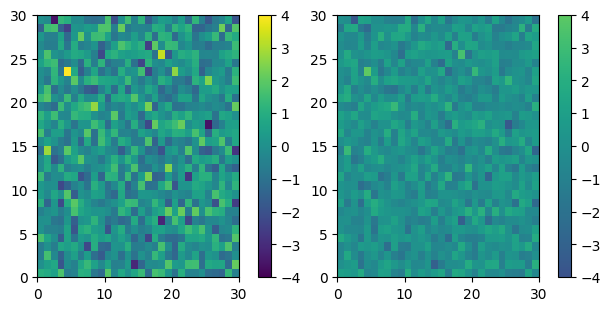

In [10]:
viridis_big = mpl.colormaps['viridis']
newcmp = ListedColormap(viridis_big(np.linspace(0.25, 0.75, 128)))
plot_examples([viridis, newcmp])

and we can easily concatenate two colormaps:



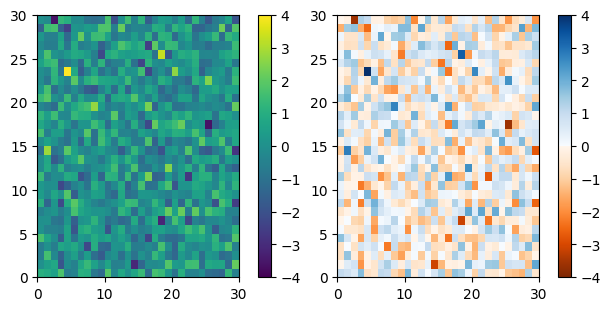

In [11]:
top = mpl.colormaps['Oranges_r'].resampled(128)
bottom = mpl.colormaps['Blues'].resampled(128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
plot_examples([viridis, newcmp])

Of course we need not start from a named colormap, we just need to create
the Nx4 array to pass to `.ListedColormap`. Here we create a colormap that
goes from brown (RGB: 90, 40, 40) to white (RGB: 255, 255, 255).



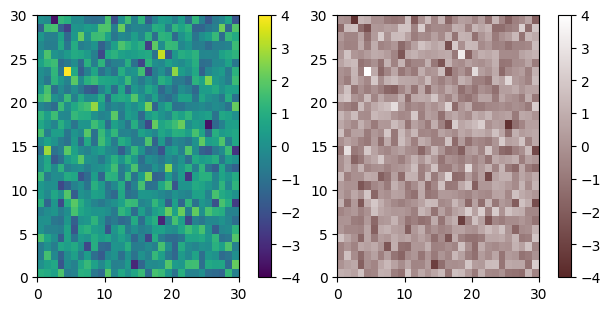

In [12]:
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(90/256, 1, N)
vals[:, 1] = np.linspace(40/256, 1, N)
vals[:, 2] = np.linspace(40/256, 1, N)
newcmp = ListedColormap(vals)
plot_examples([viridis, newcmp])

## Creating linear segmented colormaps

The `.LinearSegmentedColormap` class specifies colormaps using anchor points
between which RGB(A) values are interpolated.

The format to specify these colormaps allows discontinuities at the anchor
points. Each anchor point is specified as a row in a matrix of the
form ``[x[i] yleft[i] yright[i]]``, where ``x[i]`` is the anchor, and
``yleft[i]`` and ``yright[i]`` are the values of the color on either
side of the anchor point.

If there are no discontinuities, then ``yleft[i] == yright[i]``:



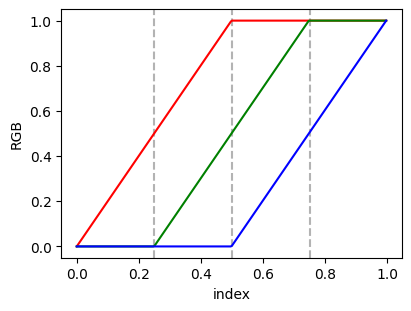

In [13]:
cdict = {'red':   [[0.0,  0.0, 0.0],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.25, 0.0, 0.0],
                   [0.75, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [1.0,  1.0, 1.0]]}


def plot_linearmap(cdict):
    newcmp = LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
    rgba = newcmp(np.linspace(0, 1, 256))
    fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
    col = ['r', 'g', 'b']
    for xx in [0.25, 0.5, 0.75]:
        ax.axvline(xx, color='0.7', linestyle='--')
    for i in range(3):
        ax.plot(np.arange(256)/256, rgba[:, i], color=col[i])
    ax.set_xlabel('index')
    ax.set_ylabel('RGB')
    plt.show()

plot_linearmap(cdict)

In order to make a discontinuity at an anchor point, the third column is
different than the second.  The matrix for each of "red", "green", "blue",
and optionally "alpha" is set up as::

  cdict['red'] = [...
                  [x[i]      yleft[i]     yright[i]],
                  [x[i+1]    yleft[i+1]   yright[i+1]],
                 ...]

and for values passed to the colormap between ``x[i]`` and ``x[i+1]``,
the interpolation is between ``yright[i]`` and ``yleft[i+1]``.

In the example below there is a discontinuity in red at 0.5.  The
interpolation between 0 and 0.5 goes from 0.3 to 1, and between 0.5 and 1
it goes from 0.9 to 1.  Note that ``red[0, 1]``, and ``red[2, 2]`` are both
superfluous to the interpolation because ``red[0, 1]`` (i.e., ``yleft[0]``)
is the value to the left of 0, and ``red[2, 2]`` (i.e., ``yright[2]``) is the
value to the right of 1, which are outside the color mapping domain.



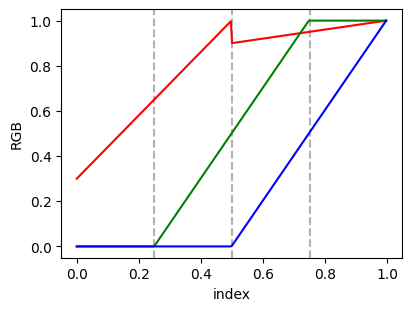

In [14]:
cdict['red'] = [[0.0,  0.0, 0.3],
                [0.5,  1.0, 0.9],
                [1.0,  1.0, 1.0]]
plot_linearmap(cdict)

### Directly creating a segmented colormap from a list

The approach described above is very versatile, but admittedly a bit
cumbersome to implement. For some basic cases, the use of
`.LinearSegmentedColormap.from_list` may be easier. This creates a segmented
colormap with equal spacings from a supplied list of colors.



In [15]:
colors = ["darkorange", "gold", "lawngreen", "lightseagreen"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

If desired, the nodes of the colormap can be given as numbers between 0 and
1. For example, one could have the reddish part take more space in the
colormap.



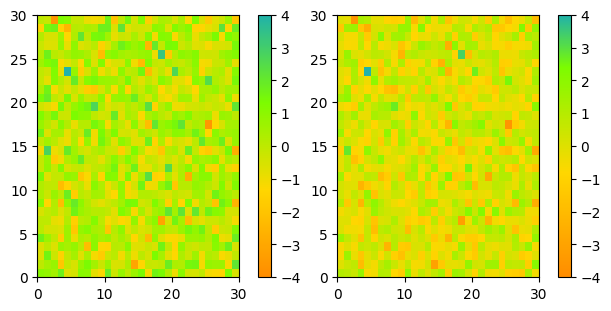

In [16]:
nodes = [0.0, 0.4, 0.8, 1.0]
cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

plot_examples([cmap1, cmap2])


## Reversing a colormap

`.Colormap.reversed` creates a new colormap that is a reversed version of
the original colormap.



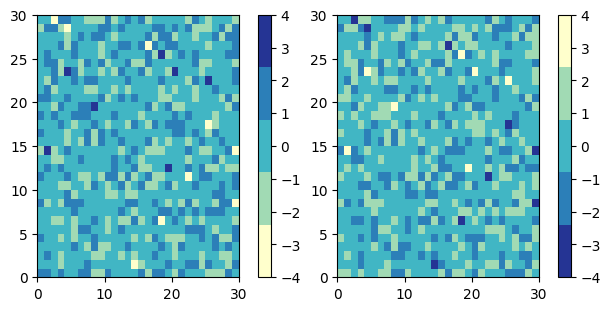

In [17]:
colors = ["#ffffcc", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]
my_cmap = ListedColormap(colors, name="my_cmap")

my_cmap_r = my_cmap.reversed()

plot_examples([my_cmap, my_cmap_r])

If no name is passed in, ``.reversed`` also names the copy by
`appending '_r' <registering-colormap>` to the original colormap's
name.




## Registering a colormap

Colormaps can be added to the `matplotlib.colormaps` list of named colormaps.
This allows the colormaps to be accessed by name in plotting functions:



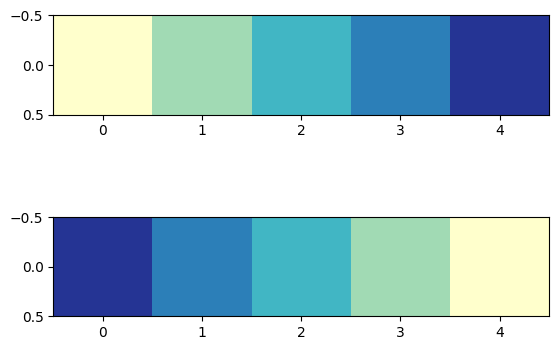

In [18]:
# my_cmap, my_cmap_r from reversing a colormap
mpl.colormaps.register(cmap=my_cmap)
mpl.colormaps.register(cmap=my_cmap_r)

data = [[1, 2, 3, 4, 5]]

fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.imshow(data, cmap='my_cmap')
ax2.imshow(data, cmap='my_cmap_r')

plt.show()

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.axes.Axes.pcolormesh`
   - `matplotlib.figure.Figure.colorbar`
   - `matplotlib.colors`
   - `matplotlib.colors.LinearSegmentedColormap`
   - `matplotlib.colors.ListedColormap`
   - `matplotlib.cm`
   - `matplotlib.colormaps`

